## **Lectura 4: Ejemplo**

# Algoritmo de Euler

En este tutorial exploraremos el algoritmo de Euler. Este algoritmo se utiliza para encontrar un camino que visite cada arista de un grafo exactamente una vez. Este camino se llama camino euleriano. También veremos cómo implementar este algoritmo en Python.

## Siete puentes de Königsberg

Lo que ves a continuación es el hermoso casco antiguo de Königsberg, famoso por sus siete puentes. Cada uno de estos puentes conecta dos grandes islas -Kneiphof y Lomse- o dos partes continentales de la ciudad.

![](../Images/konigsberg.jpg)

Lo que dio fama a la ciudad es una pregunta que se hizo al matemático Leonhard Euler hace casi 300 años:

> ***¿Se puede dar un paseo por Königsberg visitando cada masa cruzando cada puente una y sólo una vez?***

La resolución negativa de Euler a esta pregunta sentó las bases de la teoría de grafos. Antes de sumergirnos en la solución de Euler, reformulemos el problema.

### Reformulación del problema en términos abstractos

Para poder verlo con claridad, primero debemos simplificar un poco el mapa inicial.


Euler observó que la elección de la ruta dentro de cada masa de tierra es irrelevante. Lo único que importa es la secuencia de puentes que hay que cruzar. Esta observación nos permite abstraer aún más el problema. En el gráfico siguiente, los vértices azules representan las masas de tierra y las aristas, los puentes que las conectan.

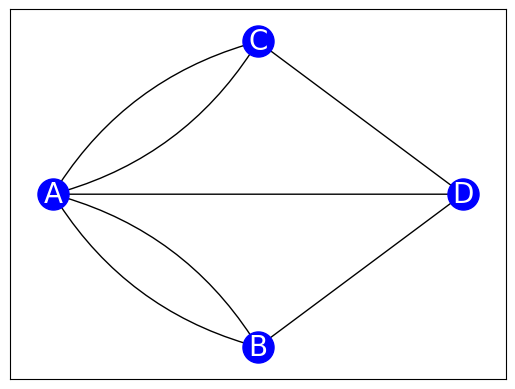

In [9]:
import networkx as nx

G = nx.DiGraph()
G.add_edge("A", "B", label="a")
G.add_edge("B", "A", label="b")
G.add_edge("A", "C", label="c")
G.add_edge("C", "A", label="d")
G.add_edge("A", "D", label="e")
G.add_edge("B", "D", label="f")
G.add_edge("C", "D", label="g")

positions = {"A": (0, 0), "B": (1, -2), "C": (1, 2), "D": (2, 0)}

nx.draw_networkx_nodes(G, pos=positions, node_size=500, node_color="blue")
nx.draw_networkx_labels(G, pos=positions, font_size=20, font_color="w") 
nx.draw_networkx_edges(
    G, pos=positions, edgelist=[("A", "D"), ("B", "D"), ("C", "D")], arrowstyle="-")
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=[("A", "B"), ("B", "A"), ("C", "A"), ("A", "C")],
    arrowstyle="-",
    connectionstyle="arc3,rad=0.2", # vea https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.ConnectionStyle.html#matplotlib.patches.ConnectionStyle
);

Basándonos en esta abstracción, podemos parafrasear el problema de la siguiente manera:

> ***¿Puedes dibujar la gráfica de arriba sin levantar el bolígrafo o cruzar sobre una línea más de una vez?***

Si puedes, significa que hay una ***Camino de Euler*** en el gráfico. Si esta trayectoria empieza y acaba en el mismo círculo azul, se llama ***Circuito de Euler***. 

Observa que todo Circuito de Euler es también una camino de Euler.

### Método de Euler

Eule denota las masas de tierra de la ciudad con las letras mayúsculas $A$, $B$, $C$ y $D$ y los puentes con las minúsculas $a$, $b$, $c$, $d$, $e$, $f$ y $g$. Dibujemos el grafo basándonos en estas etiquetas de nodos y aristas.

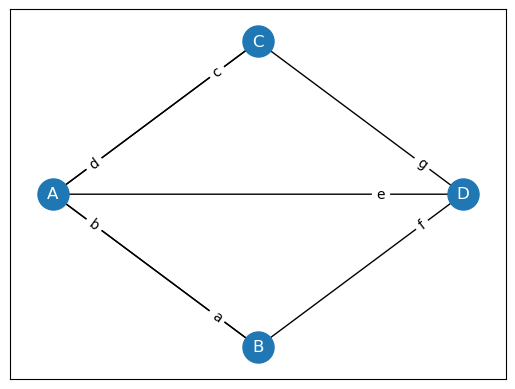

In [4]:
edge_labels = nx.get_edge_attributes(G, "label")

nx.draw_networkx_nodes(G, pos=positions, node_size=500)
nx.draw_networkx_labels(G, pos=positions, font_color="w")
nx.draw_networkx_edges(
    G, pos=positions, edgelist=[("A", "D"), ("B", "D"), ("C", "D")], arrowstyle="-"
)
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=[("A", "B"), ("B", "A"), ("C", "A"), ("A", "C")],
    arrowstyle="-",
    #connectionstyle="arc3,rad=0.2",
)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, label_pos=0.2);

Describió su lógica de la siguiente manera:
- Si cruzamos el puente $a$, caminamos de $A$ a $B$. En este caso, nuestra ruta de viaje se denota como $AB$. 
- Si cruzamos primero $a$ y luego $f$, nuestra ruta será $ABD$.
- Por tanto, el uso secuencial de $n$ puentes se indica con $n+1$ mayúsculas.
- Dado que tenemos que cruzar cada uno de los 7 puentes, nuestra ruta debe consistir en una secuencia de $A$, $B$, $C$ y $D$ de longitud 8.

También ha indicado que el número de apariciones de cada masa de tierra en la ruta depende del número de puentes que tenga.
- $A$ tiene 5 puentes. Estos 5 puentes deberían aparecer en nuestro Camino de Euler exactamente una vez. Entonces, $A$ debería aparecer en nuestra ruta 3 veces.
- $B$ tiene 3 puentes. Debería aparecer en la ruta durante 2 veces.
- $C$ tiene 3 puentes. Debe aparecer en la ruta 2 veces.
- $D$ tiene 3 puentes. Debe aparecer en la ruta 2 veces.
- Entonces, la longitud total de la ruta debe ser 3 + 2 + 2 + 2 = 9.

Es obvio que no podemos satisfacer ambas condiciones al mismo tiempo. Por lo tanto, Euler concluyó que no hay solución al problema de los Siete Puentes de Königsberg (es decir, Königsberg no tiene un Camino de Euler).

### Generalización de la solución de Euler

Euler generalizó el método que aplicó para el problema de Königsberg de la siguiente manera:

> ***Un grafo tiene una camino de Euler si y sólo si el número de vértices con grado impar es cero o dos.***

- Si hay dos vértices con grado impar, entonces son los vértices inicial y final.
- Si no hay vértices con grado impar, cualquier vértice puede ser vértice inicial o final y el grafo tiene también un Circuito de Euler.

## Implementación del Algoritmo de Euler en NetworkX

NetworkX implementa varios métodos utilizando el algoritmo de Euler. Estos son:
- **is_eulerian** : Si el grafo tiene un circuito euleriano
- **circuito_euleriano** : Secuencia de aristas de un circuito euleriano en el grafo.
- **eulerizar** : Transforma un grafo en un grafo euleriano
- **is_semieulerian** : Si el grafo tiene un camino euleriano pero no un circuito euleriano.
- **has_eulerian_path**: Si el grafo tiene un camino euleriano.
- **eulerian_path** : Secuencia de aristas de un camino euleriano en el grafo.



En esta parte explicaremos brevemente la implementación en NetworkX del algoritmo de Euler explicando algunos de estos métodos.

**Nota**: La implementación de NetworkX no permite que los grafos con nodos aislados tengan Trayectoria Euleriana y/o Circuito Euleriano. Por lo tanto, un Camino Euleriano o Circuito Euleriano debe visitar no sólo todas las aristas, sino también todos los vértices del grafo.


### 1. Implementación del circuito euleriano

La implementación del método `is_eulerian` es bastante simple. Para tener un circuito de Euler (es decir, para ser euleriano):
- Un grafo dirigido debe estar fuertemente conectado y cada vértice debe tener igual grado de entrada y de salida.
- Un grafo no dirigido debe estar conectado y no debe tener vértices de grado impar.

He aquí un ejemplo:

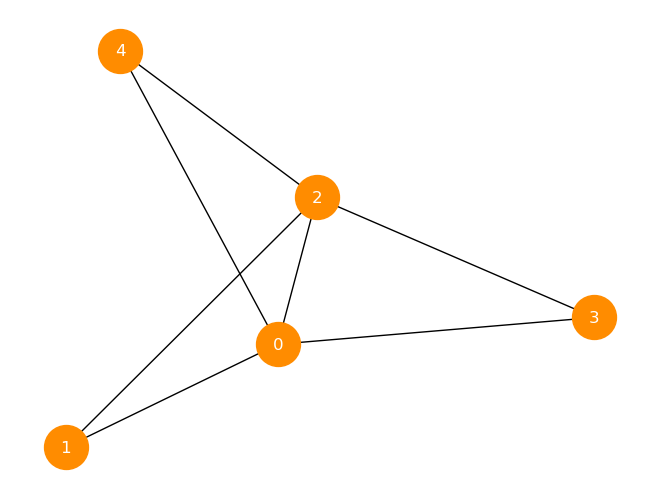

In [12]:
T = nx.Graph([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (2, 3), (2, 4)])
nx.draw(
    T, with_labels=True, node_size=1000, font_color="White", node_color="darkorange"
)

In [13]:
def is_eulerian(G):
    if G.is_directed():
        return all(
            G.in_degree(n) == G.out_degree(n) for n in G
        ) and nx.is_strongly_connected(G)
    else:
        return all(d % 2 == 0 for v, d in G.degree()) and nx.is_connected(G)

In [14]:
is_eulerian(T)

True

NetworkX has also implemented the `eulerian_circuit` method to determine sequence of edges that consist of a Euler Circuit.

The method uses a stack data structure to keep vertices, it starts with the source vertex and pushes into stack. At each following iteration, it pops a vertex from the stack, chooses a neighbor of it, pushes the chosen vertex to the stack and removes the chosen edge from the graph.

```python
circuit = []

if G.is_directed():
    degree = G.out_degree
    edges = G.out_edges
else:
    degree = G.degree
    edges = G.edges

vertex_stack = [0]
last_vertex = None
while vertex_stack:
    current_vertex = vertex_stack[-1]
    circuit.append(current_vertex)
    if G.degree(current_vertex) == 0:
        if last_vertex is not None:
            break
        last_vertex = current_vertex
        vertex_stack.pop()
    else:
        _, next_vertex = next(iter(G.edges(current_vertex)))
        vertex_stack.append(next_vertex)
        G.remove_edge(current_vertex, next_vertex)
```



### 2. Implementación del camino euleriano

La implementación de Networkx de `has_eulerian_path` primero comprueba si el grafo `is_eulerian` o no. Recuerda que si un grafo es euleriano (es decir, tiene Circuito de Euler), entonces también tiene Trayectoria Euleriana.

```python
def has_eulerian_path(G, source=None):
    if nx.is_eulerian(G):
        return True
```

Si un grafo no dirigido no es euleriano, puede ser `semi_euleriano`, lo que significa que puede tener un camino euleriano con vértices iniciales y finales diferentes. Como se ha explicado anteriormente, esto es posible si y sólo si
- hay exactamente dos vértices de grado impar, y
- todos sus vértices pertenecen a una única componente conexa.

Si el vértice de origen es dado por el usuario, debe tener un grado impar. En caso contrario, no puede existir un Camino Euleriano que parta del origen dado.

```python
    if G.is_directed() == False:
        if source is not None and G.degree[source] % 2 != 1:
            return False
        return(sum(d % 2 == 1 for _, d in G.degree()) == 2 and nx.is_connected(G))
```


Para que un grafo dirigido tenga un Camino Euleriano, debe tener 
- a lo sumo un vértice tiene out_degree - in_degree = 1,
- como máximo un vértice tiene grado_de_entrada - grado_de_salida = 1,
- todos los demás vértices tienen igual grado_de_entrada y grado_de_salida, y 
- todos sus vértices pertenecen a un único componente conexo del grafo no dirigido subyacente *(es decir, debe estar débilmente conexo)*.


```python
    if G.is_directed():
        ins = G.in_degree
        outs = G.out_degree
        if source is not None and outs[source] - ins[source] != 1:
            return False

        unbalanced_ins = 0
        unbalanced_outs = 0
        for v in G:
            if ins[v] - outs[v] == 1:
                unbalanced_ins += 1
            elif outs[v] - ins[v] == 1:
                unbalanced_outs += 1
            elif ins[v] != outs[v]:
                return False

        return (
            unbalanced_ins <= 1 and unbalanced_outs <= 1 and nx.is_weakly_connected(G)
        )
```

Utilizando métodos ya implementados, ```is_semieulerian`` simplemente comprueba si el grafo de entrada no tiene un circuito euleriano sino un camino euleriano con una sola línea de código.

In [6]:
def is_semieulerian(G):
    return has_eulerian_path(G) and not is_eulerian(G)

### 3. Ejemplos

Vamos a aplicar los métodos anteriores al problema de los Siete Puentes. Por las razones explicadas anteriormente, esperamos que nuestro grafo no tenga ni un Circuito Euleriano ni un Camino Euleriano.

In [7]:
nx.is_eulerian(G)

False

In [8]:
nx.has_eulerian_path(G)

False

Podemos concluir esta sección con otro ejemplo. ¿Es de esperar que un gráfico de rueda tenga una trayectoria euleriana?

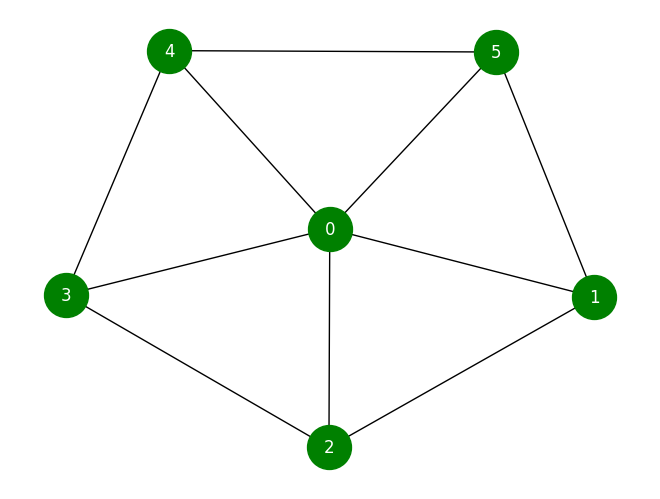

In [9]:
W = nx.wheel_graph(6)
nx.draw(W, with_labels=True, node_size=1000, font_color="White", node_color="green")

La respuesta es ¡No! Todos los nodos excepto el del centro tienen exactamente 3 aristas en el grafo de la rueda. Por lo tanto, no puede tener una trayectoria euleriana.

In [10]:
nx.has_eulerian_path(W)

False

## ¡Euler está en todas partes!

1. **Problema del cartero**: Imagina un cartero que quiere recorrer todas las calles (representadas como aristas) de una ciudad para entregar cartas, pero quiere hacerlo de la manera más eficiente, minimizando el tiempo o la distancia total recorrida. El objetivo es encontrar un camino (o circuito) que pase por cada calle exactamente una vez.

2. **Sistemas de logística y distribución**: Imagina una flota de camiones que tienen que recoger y entregar paquetes a varias ubicaciones. Al modelar este problema como un grafo, el objetivo es optimizar las rutas de los camiones para minimizar el tiempo y la distancia total recorrida.

3. **Planificación urbana y construcción de redes**: Al diseñar carreteras, puentes y otras infraestructuras en una ciudad o región, es esencial optimizar las rutas para que los vehículos puedan moverse eficientemente. El estudio de los caminos de Euler puede ayudar en esta planificación.

## Referencias

<https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg>
Euler, Leonhard, ‘Solutio problematis ad geometriam situs pertinentis’ (1741), Eneström 53, MAA Euler Archive.